<a href="https://colab.research.google.com/github/noorwewe/Intelligent-System/blob/master/Risk_Anallysis_SKFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 4.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=dddc153b3450911638b42a447db1f0e43a8b2db5a18c7d6c0ee9b8d5dc41f37a
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
project_funding = ctrl.Antecedent(np.arange(0, 101, 1), 'project_funding')
project_staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'project_staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Auto-membership function population is possible with .automf(3, 5, or 7)
#project_funding.automf(3)
#project_staffing.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
project_funding['inadequate'] = fuzz.trapmf(project_funding.universe, [0, 0, 25, 45])
project_funding['marginal'] = fuzz.trimf(project_funding.universe, [30, 50, 70])
project_funding['adequate'] = fuzz.trapmf(project_funding.universe, [55, 75, 100, 100])
project_staffing['small'] = fuzz.trapmf(project_staffing.universe, [0, 0, 20, 70])
project_staffing['large'] = fuzz.trapmf(project_staffing.universe, [30, 80, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [20, 40, 60, 80])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

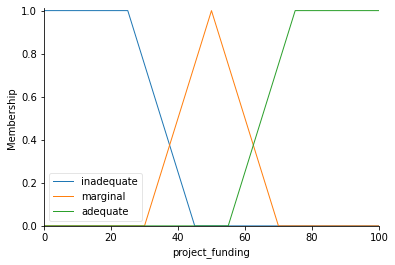

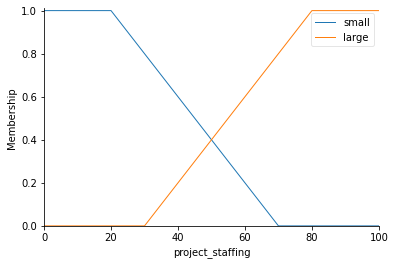

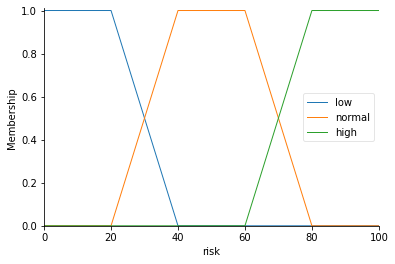

In [23]:
# You can see how these look with .view()
project_funding.view()
project_staffing.view()
risk.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87c5aba850>)

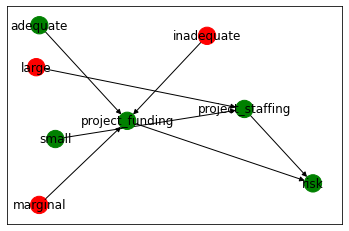

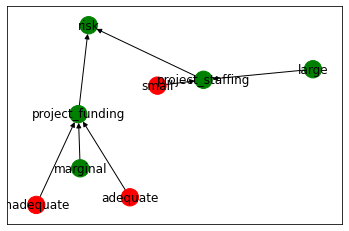

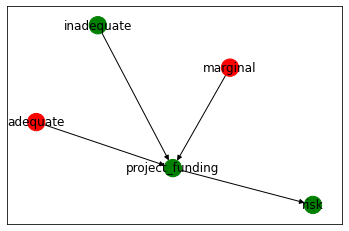

In [28]:
rule1 = ctrl.Rule(project_funding['adequate'] | project_staffing['small'], risk['low'])
rule2 = ctrl.Rule(project_funding['marginal'] & project_staffing['large'], risk['normal'])
rule3 = ctrl.Rule(project_funding['inadequate'], risk['high'])

rule1.view_n()
rule2.view_n()
rule3.view_n()

In [31]:
risk_scoring_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [32]:
risk_scoring = ctrl.ControlSystemSimulation(risk_scoring_ctrl)

In [44]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
risk_scoring.input['project_funding'] = 34
risk_scoring.input['project_staffing'] = 66

# Crunch the numbers
risk_scoring.compute()

67.05713620759873


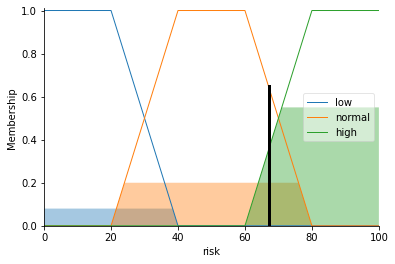

In [45]:
print (risk_scoring.output['risk'])
risk.view(sim=risk_scoring)